In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.数据处理，获得关键字频率排名

#### 1.1数据去重

In [18]:
df = pd.read_json(r'Project/art_crawl/article/article/spiders/author_use.json')

In [20]:
df.head()

,title,abstract,author,ins,author_num,date,keywords,fund,participation,Unnamed: 0,province,city
0,新型城镇化的关键改革与突破口选择,新型城镇化的实施需要一个统筹城乡的系统性改革框架。目前已经出台的改革方案和政策仍然存在较为严...,王瑞民,中国人民大学,14,2015年01期,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",[],0.50,0,北京,北京
1,新型城镇化的关键改革与突破口选择,新型城镇化的实施需要一个统筹城乡的系统性改革框架。目前已经出台的改革方案和政策仍然存在较为严...,陶然,中国人民大学,81,2015年01期,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",[],0.50,0,北京,北京
2,规划教育——从学位教育到职业发展,"<正>非常欢迎大家参加这个关于教育和人才的论坛。参加组织这个讨论的有四家机构的代表,城市规划...",叶裕民,中国人民大学,120,2015年01期,[],[],1.00,0,北京,北京
3,我国乡村治理的本原模式研究——以巴林左旗后兴隆地村为例,"乡村治理多方参与主体包括政府、企业、规划师和农民,在乡村治理公共政策制定实施过程中,我国普遍...",郐艳丽,中国人民大学,49,2015年06期,"[乡村治理, 本原模式, 农民置上, 农民置下]",[],1.00,0,北京,北京
4,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"城市群在国家和地区发展中具有重要的经济社会地位,也是区域空间格局演变的重要形式。本文以分别位...",刘涛,中国人民大学,48,2016年02期,"[城市群, 集聚, 扩散, 驱动机制]",[国家自然科学基金项目(41371166)阶段性成果],0.33,0,北京,北京


In [22]:
#数据去重
df = df.drop_duplicates(subset='title')

In [23]:
df = df[['title','keywords','date']]
df.head()

,title,keywords,date
0,新型城镇化的关键改革与突破口选择,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",2015年01期
2,规划教育——从学位教育到职业发展,[],2015年01期
3,我国乡村治理的本原模式研究——以巴林左旗后兴隆地村为例,"[乡村治理, 本原模式, 农民置上, 农民置下]",2015年06期
4,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"[城市群, 集聚, 扩散, 驱动机制]",2016年02期
5,面向存量规划的我国城市公共物品生产模式变革,"[存量规划, 城市公共物品, 生产模式, 激励性区划, 政策与制度建议]",2016年03期


#### 1.2日期变数字

In [27]:
df.date = df.date.apply(lambda x:int(x.split('年')[0]))

In [28]:
df.head()

,title,keywords,date
0,新型城镇化的关键改革与突破口选择,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",2015
2,规划教育——从学位教育到职业发展,[],2015
3,我国乡村治理的本原模式研究——以巴林左旗后兴隆地村为例,"[乡村治理, 本原模式, 农民置上, 农民置下]",2015
4,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"[城市群, 集聚, 扩散, 驱动机制]",2016
5,面向存量规划的我国城市公共物品生产模式变革,"[存量规划, 城市公共物品, 生产模式, 激励性区划, 政策与制度建议]",2016


#### 1.3关键字拆分

In [90]:
class display():
    template="""<div style="float: left;padding: 10px;">
    <p style='font-family:"Courier New",Courier,monospace'>{0}</p>{1}
    </div>"""
    def __init__(self,*args):
        self.args = args
    
    def _repr_html_(self):
        return '\n'.join(self.template.format(a,eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                          for a in self.args)
a = np.array((1,2,[1,2,3]))
b = np.array((2,3,[4,5,6,7]))
a1 = pd.DataFrame(np.column_stack((a,b)),columns=['a','b'])
a2 = pd.DataFrame(np.vstack((a,b)),columns=['a','b','c'])
a3 = pd.DataFrame(np.hstack((a,b)),columns=['a',])
display('a1','a2','a3')

a1
           a             b
0          1             2
1          2             3
2  [1, 2, 3]  [4, 5, 6, 7]

a2
   a  b             c
0  1  2     [1, 2, 3]
1  2  3  [4, 5, 6, 7]

a3
              a
0             1
1             2
2     [1, 2, 3]
3             2
4             3
5  [4, 5, 6, 7]

In [92]:
a2.a.repeat(2)

0    1
0    1
1    2
1    2
Name: a, dtype: object

In [151]:
a2.a.values

array([1, 2], dtype=object)

In [91]:
a2.a.values.repeat(2)

array([1, 1, 2, 2], dtype=object)

In [154]:
#用列表来表示每个值重复的次数，列表长度与值数相同
a2.a.values.repeat([1,3])

array([1, 2, 2, 2], dtype=object)

In [158]:
len(a2[['a','b']].values)

2

In [162]:
#axis参数必须加，是横着重复还是纵着重复
a2[['a','b']].values.repeat([1,3],axis=0)

array([[1, 2],
       [2, 3],
       [2, 3],
       [2, 3]], dtype=object)

In [163]:
a2[['a','b']].values.repeat([1,3],axis=1)

array([[1, 2, 2, 2],
       [2, 3, 3, 3]], dtype=object)

In [168]:
np.hstack(a2.c)

array([1, 2, 3, 4, 5, 6, 7])

In [169]:
a2[['a','b']].values.repeat(list(map(len,a2.c)),axis=0)

array([[1, 2],
       [1, 2],
       [1, 2],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3]], dtype=object)

In [170]:
#python2中map结果是list，python中是一个可迭代对象，需要转为list
np.column_stack((a2[['a','b']].values.repeat(list(map(len,a2.c)),axis=0),
                np.hstack(a2.c)))

array([[1, 2, 1],
       [1, 2, 2],
       [1, 2, 3],
       [2, 3, 4],
       [2, 3, 5],
       [2, 3, 6],
       [2, 3, 7]], dtype=object)

In [174]:
#DataFrame列表对象拆分
df_keywords = pd.DataFrame(\
                          np.column_stack((\
                                          df[['title','date']].values.repeat(list(map(len,df.keywords)),axis=0),
                                           np.hstack(df.keywords)
                                          )),
                           columns=['title','date','keyword']
                          )

In [176]:
df_keywords.head()

,title,date,keyword
0,新型城镇化的关键改革与突破口选择,2015,新型城镇化
1,新型城镇化的关键改革与突破口选择,2015,户籍制度
2,新型城镇化的关键改革与突破口选择,2015,城中村土地制度改革
3,新型城镇化的关键改革与突破口选择,2015,工业用地重整
4,新型城镇化的关键改革与突破口选择,2015,农地整理


In [184]:
df_keywords.groupby(by='keyword')['keyword'].count().sort_values(ascending=False).head()

keyword
城镇化     15
城市规划    15
北京      12
城市设计    10
城市更新     9
Name: keyword, dtype: int64

### 2.文字云图可视化关键字

#### 2.1wordcloud安装
conda install wordcloud
或者
pip install wordcloud

#### 2.2教程
https://amueller.github.io/word_cloud/auto_examples/masked.html#sphx-glr-auto-examples-masked-py

In [187]:
import wordcloud

In [188]:
from wordcloud import WordCloud

In [190]:
#WordCloud对象为逗号分割的字符串
text = ','.join([i for i in df_keywords.keyword])

In [193]:
WdCld = WordCloud().generate(text)

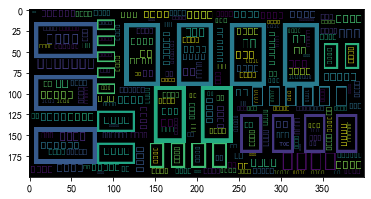

In [196]:
plt.imshow(WdCld)

In [197]:
#设置字体，背景色
WdCld = WordCloud(font_path=r'C:/Windows/Fonts/SimHei.ttf',background_color='white').generate(text)

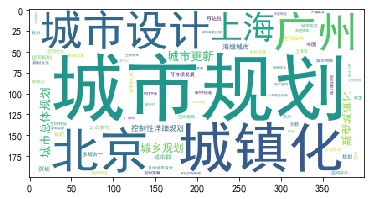

In [198]:
plt.imshow(WdCld)

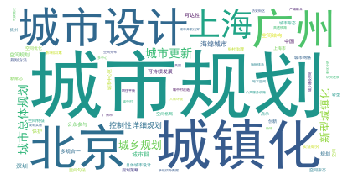

In [200]:
#去掉坐标轴
plt.axis('off')
plt.imshow(WdCld)

In [211]:
#掩模底图的使用
from PIL import Image
from wordcloud import STOPWORDS,WordCloud
path = r'Project\art_crawl\article\article\spiders\china.png'

In [210]:
cn_mask = np.array(Image.open(path))

(-0.5, 899.5, 733.5, -0.5)

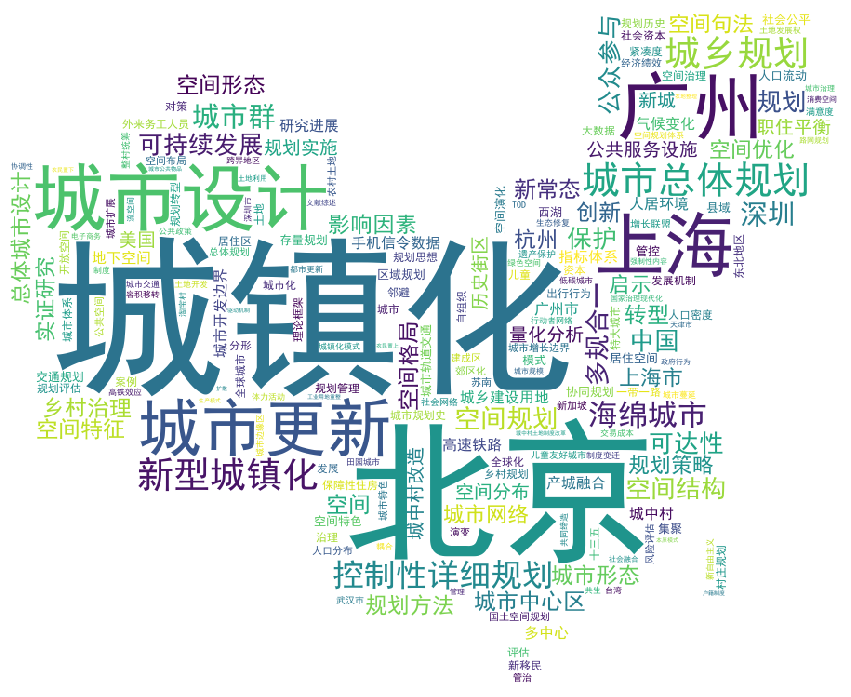

In [243]:
stopwords = set(STOPWORDS)
stopwords.add('城市规划')

plt.figure(figsize=(15,15))
WdCld = WordCloud(font_path=r'C:/Windows/Fonts/SimHei.ttf',background_color="white", max_words=200, mask=cn_mask,
               stopwords=stopwords)
WdCld.generate(text)
plt.imshow(WdCld)
plt.axis("off")

In [240]:
WdCld.to_file(r"Project\art_crawl\article\article\spiders\cn.png")

Text(0.5, 1.0, '2015-1019年关键词')

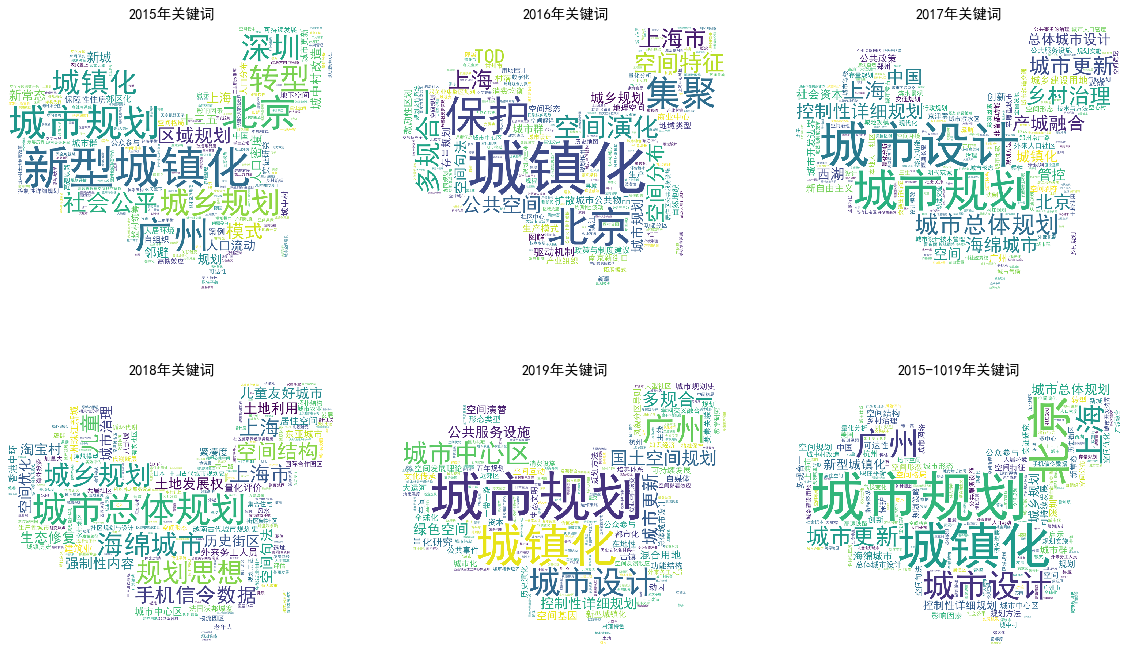

In [255]:
plt.figure(figsize=(20,12))
for i in range(1,6):
    plt.subplot(2,3,i)
    df_year = df_keywords[df_keywords['date'] == 2014+i]
    text = ','.join([k for k in  df_year.keyword])
    wc = WordCloud(font_path=r'C:/Windows/Fonts/SimHei.ttf',background_color="white", max_words=200, mask=cn_mask)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(str(2014+i)+'年关键词')

plt.subplot(2,3,6)
text = ','.join([i for i in df_keywords.keyword])
wc = WordCloud(font_path=r'C:/Windows/Fonts/SimHei.ttf',background_color="white", max_words=200, mask=cn_mask)
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.title(u'2015-1019年关键词')
# plt.subplots_adjust(hspace=0.1,wspace=-0.1)